## STATISTICS MINI PROJECT|

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fifa_stats.csv")
df

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.750000,157
1996,E. ZukanoviÄ‡,31,Bosnia Herzegovina,75,75,Genoa,Left,2,3,2,Low/ High,CB,87,6.250000,187
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.083333,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.083333,159


#### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [3]:
age = df["Age"]
age

0       31
1       33
2       26
3       27
4       27
        ..
1995    22
1996    31
1997    22
1998    32
1999    28
Name: Age, Length: 2000, dtype: int64

In [4]:
mu = np.mean(age)
sigma = np.std(age)
print("The mean of the population age is", mu)
print("The standard deviation of population age is", sigma)

The mean of the population age is 27.2315
The standard deviation of population age is 3.8580963894127795


In [5]:
n= 200
sample = np.random.choice(age,200)
x_bar = np.mean(sample)
s = np.std(sample, ddof =1)
print("The mean of the sample age is", x_bar)
print("The standard deviation of sample age is", s)

The mean of the sample age is 26.87
The standard deviation of sample age is 3.792759566018935


In [9]:
print("Mean of Population is ", mu)
print("Mean of sample is ", x_bar)
print("The standard deviation of population is", sigma)
print("The standard deviation of sample is", s)


Mean of Population is  27.2315
Mean of sample is  26.87
The standard deviation of population is 3.8580963894127795
The standard deviation of sample is 3.792759566018935


In [6]:
standard_error = sigma/(n**0.5)
standard_error

0.2728086119425111

In [7]:
#Consider increase in sample length fron n=200 to n=350
standard_error_new = sigma/(350**0.5)
standard_error_new

0.20622392649045998

#From above we can see as the length of the sample increases the standard error decreases because
larger the sample, the less variable the sample mean.

#### b)	Is there any evidence that the players overall rating is greater than 80?

In [3]:
rating = df["Overall_rating"]


##### #Hypothesis
H0: overall rating <= 80

Ha: overall rating > 80

In [15]:
#taking sample of length 400
sample = np.random.choice(rating, 400)
n= 400
#Testing for normality of the sample
#H0: skew = 0
#Ha: skew != 0

In [16]:
stats.shapiro(sample)

ShapiroResult(statistic=0.8249976634979248, pvalue=1.483398179010403e-20)

In [17]:
#pval = 0.000
#pval < 0.05
#reject H0
#Data is not normal

#### Using wilcoxon Signed Ranked Test

In [19]:
#Hypothesised median = 80
M = 80
diff = sample-M

In [20]:
stat, pval = stats.wilcoxon(x = diff, alternative = "greater")
print("test statistic", stat)
print("p value", pval)

test statistic 14484.0
p value 1.0


In [21]:
#pval = 1
#pval > sig lvl(0.05)
#Fail to reject H0
#overall rating is less than or equal to 80

#### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [22]:
#Hypothesis
#H0: preferred foot has no impact on potential (left foot = right foot)
#Ha: preferred foot has impact on potential (left foot != right foot)

In [5]:
left = df[df["Preferred Foot"] == "Left"]["Potential"]
right = df[df["Preferred Foot"] == "Right"]["Potential"]

1       94
2       93
3       93
4       92
5       91
        ..
1993    75
1995    82
1997    82
1998    75
1999    75
Name: Potential, Length: 1534, dtype: int64

In [6]:
stats.shapiro(left)

ShapiroResult(statistic=0.9422042369842529, pvalue=1.7173475098594682e-12)

In [7]:
stats.shapiro(right)

ShapiroResult(statistic=0.9369121193885803, pvalue=5.342442151473519e-25)

In [ ]:
#Both left foor and right foot potential data is not normal
#We cannot use one-way anova
#Using Wilcoxon Ranked sum test unpaired

In [8]:
test_stat, p_value = stats.ranksums(left, right)


In [9]:
# divide the p-value by 2
req_p_val = p_value/2

# print the test statistic value and corresponding p-value
print('Test Statistic:', test_stat)
print('p-value:', req_p_val)

Test Statistic: 1.2127805577705568
p-value: 0.11260686531708575


In [ ]:
#pval = 0.112
#pval > sig lvl
#Fail to reject H0
#preferred foot has no impact on potential (left foot = right foot)

In [ ]:
#Graphical analysis of preferred foot with potential

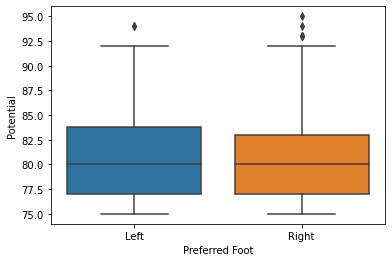

In [12]:
sns.boxplot(data=df, x = "Preferred Foot", y ="Potential")
plt.show()

<AxesSubplot:xlabel='Preferred Foot'>

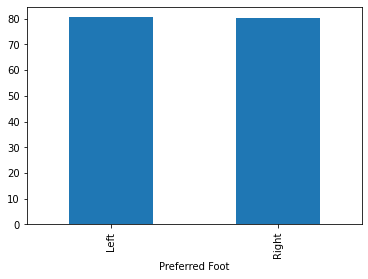

In [14]:
df.groupby(df["Preferred Foot"])["Potential"].mean().plot(kind = "bar")

#From above two plots we can say that for both left and right foot the average potentail is almost equal
which implies that preferred foot has no impact on potential

#### d)Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [31]:
potential = df["Potential"]

In [33]:
stats.shapiro(potential)

ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)

In [35]:
stats.shapiro(rating)

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)

In [36]:
#Both potential and overall_rating are not normal since pval < 0.05

In [37]:
#Using wilcoxon Ranked sum test - unpaired

In [15]:
#m1 is the median of overall rating
#m2 is the median of rating
#M=m1-m2
#Hypothesis
#H0: M = 0 (Overall rating and potential have same median and have no difference)
#Ha: M != 0 (Overall rating and potential are different)

In [39]:
test_stat, p_value = stats.ranksums(rating, potential)

In [40]:
print('Test Statistic:', test_stat)
print('p-value:', p_value)

Test Statistic: -17.218874864051195
p-value: 1.916782527373918e-66


In [41]:
#pval = 0.00000
#sig lvl = 0.05
#pval < sig lvl
#Reject H0
#Ha holds true, Overall rating and potential are different

#### e)Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [18]:
obs_val = pd.crosstab(df["Skill Moves"], df["Overall_rating"])

In [43]:
#Hypothesis
#H0: both columns are independent (skill move has no effect on rating)
#Ha: both columns are dependent (skill move has effect on rating)

In [44]:
chi2, pval, df, exp_val = stats.chi2_contingency(obs_val)
print("chi2 value is", chi2)
print("p value is", pval)

chi2 value is 264.3544361441865
p value is 9.004103479489286e-24


In [45]:
#pval = 0.00000
#sig lvl = 0.05
#pval < sig lvl
#reject H0
#both columns are dependent (skill move has effect on rating)

In [19]:
obs_val

Overall_rating,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94
Skill Moves,,,,,,,,,,,,,,,,,,,
1,38,32,23,15,19,18,5,12,13,7,2,1,1,3,3,1,1,0,0
2,96,78,63,30,24,25,13,20,10,10,12,6,3,2,2,1,0,0,0
3,219,171,138,64,72,56,28,24,17,11,9,4,7,2,3,1,2,0,0
4,74,92,75,59,52,41,43,34,27,13,8,9,1,7,3,2,3,0,1
5,2,0,5,0,4,3,4,4,3,4,2,2,1,3,0,0,0,1,1


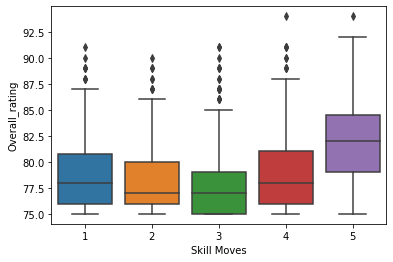

In [23]:
sns.boxplot(data=df,x='Skill Moves',y='Overall_rating')
plt.show()

In [24]:
# From above plot we can clearly see there is a lot of differnece in the average rating for different skill move rating

#### Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed.

In [25]:
df1 = pd.read_csv("phone.csv")
df1

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [13]:
df1.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

#### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [12]:
calls = df1[df1["item"] == "call"]["duration"]
calls

1       81.610599
2      143.109111
3      111.888670
4      246.695171
5      132.541300
          ...    
800    124.446289
801    105.243790
802    104.621396
803    260.813244
809     70.630836
Name: duration, Length: 388, dtype: float64

In [21]:
#checking normality of data
stats.shapiro(calls)

ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708)

In [ ]:
#data is normal

In [22]:
#taking a sample of 200 calls
sample_calls = calls.sample(n=200, random_state = 5)

In [19]:
mu = np.mean(calls)
sigma = np.std(calls)
print("mu:", mu, "sigma:", sigma)

mu: 147.60337160662627 sigma: 46.49398055711343


In [23]:
x_bar = np.mean(sample_calls)
s = np.std(sample_calls, ddof=1)
n = 200

In [24]:
#for 95% CI
z = stats.norm.isf(0.05)
z

1.6448536269514729

In [25]:
#Range
ll = x_bar-(z*(sigma/(n**0.5)))
ul = x_bar+(z*(sigma/(n**0.5)))
ll,ul

(143.1027805925728, 153.9180908944271)

In [26]:
##for 99% CI
z1 = stats.norm.isf(0.01)
z1

2.3263478740408408

In [28]:
#Range
ll1 = x_bar-(z1*(sigma/(n**0.5)))
ul1 = x_bar+(z1*(sigma/(n**0.5)))
ll1,ul1

(140.86228586695378, 156.15858562004613)

In [30]:
print("The range for 95% CI is ", ll, "-", ul)
print("The range for 99% CI is ", ll1, "-", ul1)

The range for 95% CI is  143.1027805925728 - 153.9180908944271
The range for 99% CI is  140.86228586695378 - 156.15858562004613


In [31]:
#From the results we can observe the range with 99% CI is wider since the z value is more and acceptance region is more

#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [57]:
networks = df1["network"].value_counts().to_list()

In [58]:
networks

[215, 215, 150, 87, 84, 42, 27]

In [59]:
stats.shapiro(networks)

ShapiroResult(statistic=0.8885776400566101, pvalue=0.26732590794563293)

In [52]:
df1["network"].nunique()

7

In [63]:
n = len(df1)
each = n/7
each

117.14285714285714

In [64]:
obs_val = networks
exp_val = [each,each,each,each,each,each,each]

In [ ]:
#H0: obs = exp (networks are equally distributed)
#Ha: obs != exp (networks are not equally distributed)

In [65]:
stats.chisquare(f_obs = obs_val, f_exp = exp_val)

Power_divergenceResult(statistic=307.409756097561, pvalue=2.112592760257685e-63)

In [54]:
#pval = 0.00000
#pval < 0.05
#Reject H0
#Ha holds, i.e networks are not equally distributed

#### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph

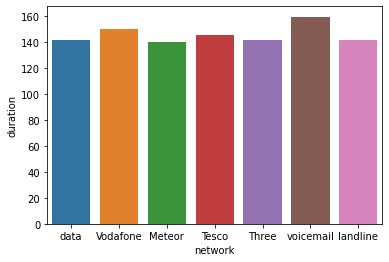

In [27]:
sns.barplot(data=df1,x='network',y='duration', ci=0)
plt.show()

In [28]:
#From the above plot we can say all the networks do not have the same average duration.

#### d)Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.


In [66]:
df1["item"].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [74]:
call = df1[df1["item"] == "call"]["duration"]
sms = df1[df1["item"] == "sms"]["duration"]
data = df1[df1["item"] == "data"]["duration"]

In [75]:
#Hypothesis
#H0: call, sms, data durations averages are equal
#Ha: atleast one average is not equal

In [76]:
stats.shapiro(call)

ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708)

In [77]:
stats.shapiro(sms)

ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526)

In [78]:
stats.shapiro(data)

ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596)

In [79]:
#All three data follow normal distribution

In [80]:
stats.levene(call, sms, data)

LeveneResult(statistic=3.4300976447008424, pvalue=0.03285087780533987)

In [81]:
#pval < 0.05
#variance is not equal
#cannot use one way anova

In [82]:
#performing kruskal wallis H test
test_stat, p_val = stats.kruskal(call, sms, data)

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_val)

Test statistic: 3.565941434870183
p-value: 0.16813791437745512


In [83]:
#pval = 0.16
#pval > 0.05
#Fail to reject H0
#call, sms, data durations averages are equal

#### e) Perform statistical tests to identify the relation between network and network_type

In [2]:

#H0: categorical columns are independent (network and network_type have no relation)
#Ha: cat col are dependent (network and network_type have a relation)

In [89]:
obs_val = pd.crosstab(df1["network"], df1["network_type"])
obs_val

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [90]:
stats.chi2_contingency(obs_val)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))

In [91]:
#pval = 0
#pval < 0.05
#Reject H0
#cat col are dependent (network and network_type have a relation)